In [20]:
pip install mplfinance

     -------------------------------------- 73.1/73.1 kB 806.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import mplfinance as mpf
# Load the CSV file into a DataFrame
df = pd.read_csv('Combined_BN_spot_2007-Latest.csv')

# Convert the 'datetime' column to datetime type
df['Date_time'] = pd.to_datetime(df['Date_time'])

# Filter the datetime range
start_date = pd.to_datetime('2011-01-01')
end_date = pd.to_datetime('2023-12-31')
filtered_df = df[(df['Date_time'] > start_date) & (df['Date_time'] <end_date)]

# Set the 'datetime' column as the index
filtered_df.set_index('Date_time', inplace=True)
#df.set_index('Date_time', inplace=True)
#new5minDf = df.resample('5t', closed='right').agg(dict(open='first', high='max', low='min', close='last', volume='sum', vwap='mean'))

# Resample the filtered data based on different time intervals
resampled_month =filtered_df.resample('M', closed='left',origin="start").agg(dict(Open='first', High='max', Low='min', Close='last')) # 1 month
resampled_week =filtered_df.resample('W-MON', closed='left',origin="start").agg(dict(Open='first', High='max', Low='min', Close='last'))# 1 week
resampled_day =filtered_df.resample('1D', closed='left',origin="start").agg(dict(Open='first', High='max', Low='min', Close='last'))  # 1 day
resampled_4hour = filtered_df.resample('4H', closed='left',origin="start").agg(dict(Open='first', High='max', Low='min', Close='last'))  # 4 hours
resampled_1hour = filtered_df.resample('60min', closed='left',origin="start").agg(dict(Open='first', High='max', Low='min', Close='last')) # 1 hour
resampled_30min = filtered_df.resample('30min', closed='left',origin="start").agg(dict(Open='first', High='max', Low='min', Close='last')) # 30 minutes
resampled_15min = filtered_df.resample('15T').agg(dict(Open='first', High='max', Low='min', Close='last'))


# Save the resampled data to new CSV files
resampled_month.to_csv('data_resampled_month.csv')
resampled_week.to_csv('data_resampled_week.csv')
resampled_day.to_csv('data_resampled_day.csv')
resampled_4hour.to_csv('data_resampled_4hour.csv')
resampled_1hour.to_csv('data_resampled_1hour.csv')
resampled_30min.to_csv('data_resampled_30min.csv')
resampled_15min.to_csv('data_resampled_15min.csv')




In [8]:
resampled_30min.head(15)

,Open,High,Low,Close
Date_time,,,,
2011-01-03 09:15:00,11882.10,11909.20,11873.35,11903.35
2011-01-03 09:45:00,11903.55,11906.55,11877.15,11877.25
2011-01-03 10:15:00,11877.25,11879.05,11841.85,11861.70
2011-01-03 10:45:00,11862.25,11865.90,11840.15,11860.80
2011-01-03 11:15:00,11860.80,11884.75,11854.60,11856.30
2011-01-03 11:45:00,11856.30,11880.10,11852.55,11852.55
2011-01-03 12:15:00,11852.55,11884.85,11841.05,11875.15
2011-01-03 12:45:00,11875.15,11898.95,11873.55,11892.50
2011-01-03 13:15:00,11889.05,11908.75,11887.30,11898.15


In [9]:
resampled_1hour.tail(15)

,Open,High,Low,Close
Date_time,,,,
2023-04-19 01:15:00,NaN,NaN,NaN,NaN
2023-04-19 02:15:00,NaN,NaN,NaN,NaN
2023-04-19 03:15:00,NaN,NaN,NaN,NaN
2023-04-19 04:15:00,NaN,NaN,NaN,NaN
2023-04-19 05:15:00,NaN,NaN,NaN,NaN
2023-04-19 06:15:00,NaN,NaN,NaN,NaN
2023-04-19 07:15:00,NaN,NaN,NaN,NaN
2023-04-19 08:15:00,NaN,NaN,NaN,NaN
2023-04-19 09:15:00,42280.10,42338.20,42141.05,42195.25


In [10]:
resampled_15min.tail(15)

,Open,High,Low,Close
Date_time,,,,
2023-04-19 11:45:00,42132.90,42155.30,42110.45,42136.25
2023-04-19 12:00:00,42136.55,42166.05,42104.55,42127.00
2023-04-19 12:15:00,42127.40,42173.15,42125.55,42156.90
2023-04-19 12:30:00,42157.70,42195.05,42143.90,42189.75
2023-04-19 12:45:00,42187.65,42246.35,42187.65,42227.65
2023-04-19 13:00:00,42228.80,42243.05,42141.50,42146.30
2023-04-19 13:15:00,42146.20,42196.50,42127.55,42139.85
2023-04-19 13:30:00,42143.70,42156.75,42043.85,42045.10
2023-04-19 13:45:00,42051.55,42125.45,42038.55,42082.85


In [14]:
resampled_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2011-01-31 to 2023-04-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    148 non-null    float64
 1   High    148 non-null    float64
 2   Low     148 non-null    float64
 3   Close   148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


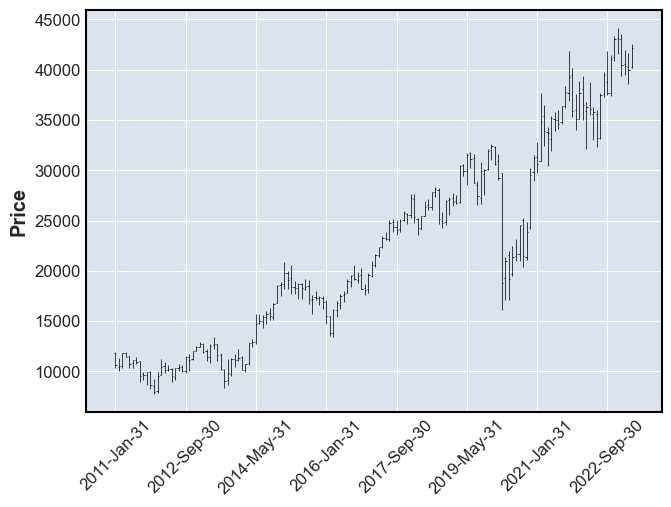

In [23]:
mpf.plot(resampled_month)

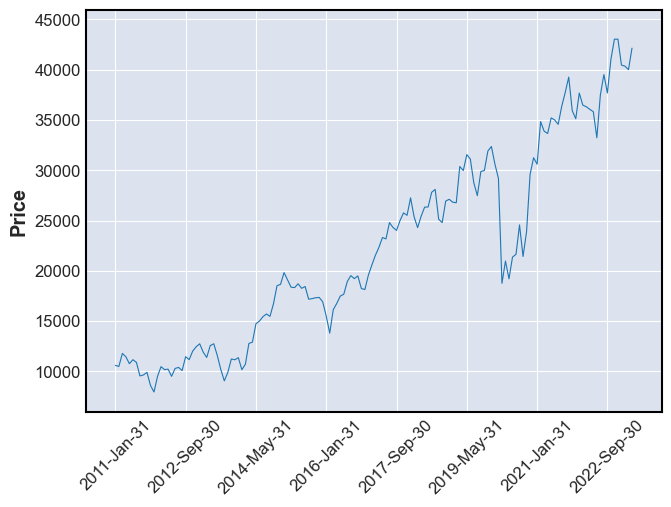

In [25]:
mpf.plot(resampled_month,type='line')

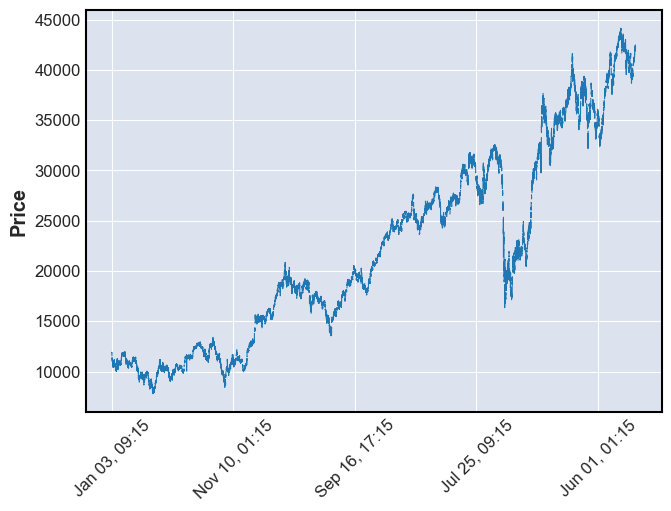

In [33]:
mpf.plot(resampled_15min,type='line')